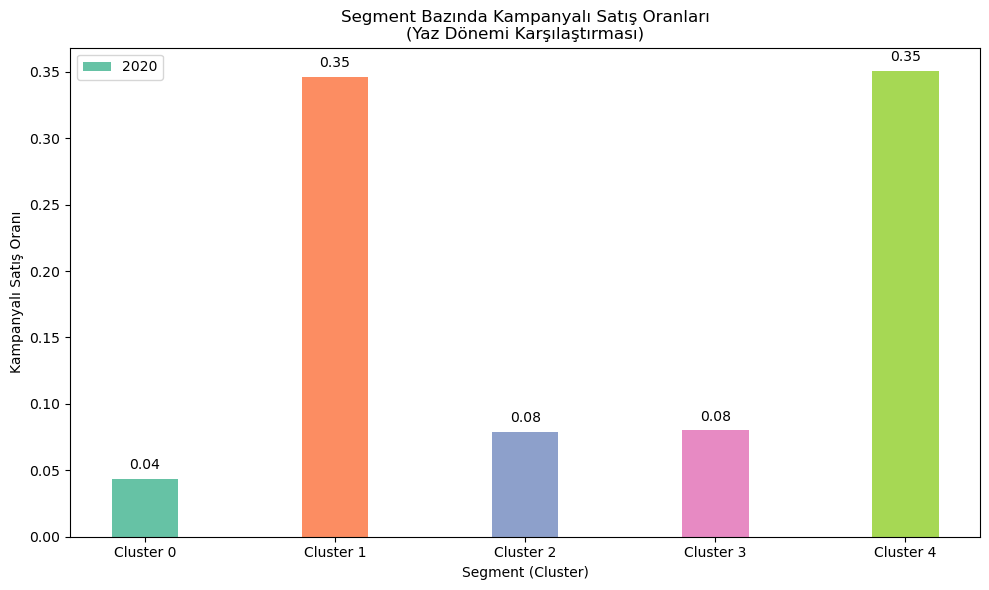

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df = pd.read_csv("campaign_data.csv")
df = df.sample(n=1000000, random_state=42)

df['t_dat'] = pd.to_datetime(df['t_dat'], errors='coerce')


df['week'] = df['t_dat'].dt.isocalendar().week
df['year'] = df['t_dat'].dt.year


df['is_campaign'] = df['is_campaign'].replace({'f': 0, 't': 1})


df_summer = df[df['week'].between(22, 35)]
df_summer = df_summer.fillna(df_summer.mean(numeric_only=True))


features = ['price', 'customer_age']
scaler = StandardScaler()
df_summer_scaled = scaler.fit_transform(df_summer[features])


kmeans = KMeans(n_clusters=5, random_state=42)
df_summer['Cluster'] = kmeans.fit_predict(df_summer_scaled)


grouped = df_summer.groupby(['year', 'Cluster'])['is_campaign'].mean().reset_index()


df_pivot = grouped.pivot(index='Cluster', columns='year', values='is_campaign')


fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("Set2", n_colors=len(df_pivot))
bar_width = 0.35
index = np.arange(len(df_pivot))


available_years = df_pivot.columns.tolist()


if len(available_years) >= 2:
    
    year1, year2 = available_years[:2]
    bars_year1 = ax.bar(index - bar_width/2, df_pivot[year1], bar_width, label=str(year1), color=colors)
    bars_year2 = ax.bar(index + bar_width/2, df_pivot[year2], bar_width, label=str(year2), color=colors)
    
    
    for i in range(len(df_pivot)):
        val_year1 = df_pivot.loc[i, year1]
        val_year2 = df_pivot.loc[i, year2]
        if val_year2 > val_year1:
            ax.text(i + bar_width/2, val_year2 + 0.005, f"{val_year2:.2f}", ha='center', va='bottom')
        else:
            ax.text(i - bar_width/2, val_year1 + 0.005, f"{val_year1:.2f}", ha='center', va='bottom')
elif len(available_years) == 1:
  
    year = available_years[0]
    ax.bar(index, df_pivot[year], bar_width, label=str(year), color=colors)
    for i in range(len(df_pivot)):
        val = df_pivot.loc[i, year]
        ax.text(i, val + 0.005, f"{val:.2f}", ha='center', va='bottom')
else:
    print("Grafik çizmek için yeterli veri yok")


ax.set_xlabel("Segment (Cluster)")
ax.set_ylabel("Kampanyalı Satış Oranı")
ax.set_title("Segment Bazında Kampanyalı Satış Oranları\n(Yaz Dönemi Karşılaştırması)")
ax.set_xticks(index)
ax.set_xticklabels([f"Cluster {i}" for i in df_pivot.index])
ax.legend()
plt.tight_layout()
plt.show()

In [19]:
df['year'].value_counts()

2020    500000
Name: year, dtype: int64

In [21]:
df.head()

,customer_id,article_id,price,is_campaign,customer_age,index_group_name,department_name,perceived_colour_value_name,t_dat,week,year
3897372,541cc987748427de74176de90683c2a6091dcfe5071e4e...,659132022,0.02,0,52.0,Ladieswear,Jersey,Medium Dusty,2020-08-20,34,2020
651720,eff7d128a2fb85600a187b894a780742c2d02bc04e8614...,658329018,0.02,0,55.0,Menswear,Jersey Fancy,Dark,2020-06-15,25,2020
2757009,debf03f157fb6b56c590d0f94f7c1ec90a54100f1be62a...,876127002,0.01,1,42.0,Divided,Dresses,Light,2020-07-23,30,2020
294076,4dd9fefdcd85736f8564ca7498269e402f890a8feca509...,688558022,0.02,0,30.0,Divided,Basic 1,Dusty Light,2020-06-07,23,2020
257075,82c1c4f0f092ecff14a455747086d328d855b62ffbe023...,448509029,0.04,0,35.0,Divided,Trousers,Light,2020-06-06,23,2020


In [22]:
df.columns

Index(['customer_id', 'article_id', 'price', 'is_campaign', 'customer_age',
       'index_group_name', 'department_name', 'perceived_colour_value_name',
       't_dat', 'week', 'year'],
      dtype='object')